In [1]:
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pylab as pl
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import osgeo.gdal as gdal
import skimage.io as SKimg
import scipy.io as sio
#from color import Colors

import sys
import ALLNeighborhoodrelationship as ABL

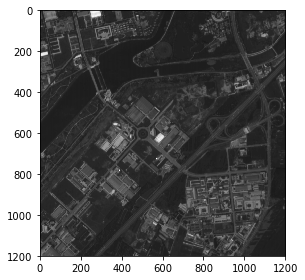

In [2]:
#读取tiff影像
Tpan =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200pan.tif")
SKimg.imshow(Tpan)
SKimg.show()
Tpan.shape

Rows=Tpan.shape[0]; Cols=Tpan.shape[1]; 
NewTpan=np.array(Tpan.reshape(Rows*Cols,1));

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


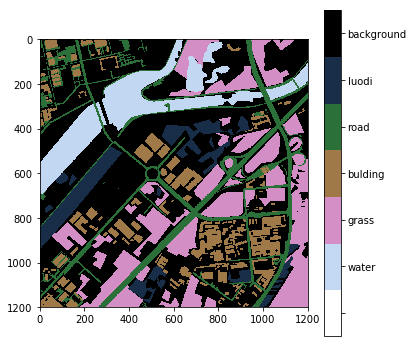

In [3]:
#matlab文件名  
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

plt.figure(figsize=(6,6))
im = Image.fromarray(mk);
plt.imshow(im,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8));
cbar.set_ticklabels((' ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5);
plt.show();

In [4]:
ALLlabel=[];   ALLclusCenters=[];
for i in range(4,9):
    KMS = KMeans(n_clusters=i, random_state=0).fit(NewTpan);
    Labels=KMS.labels_; clus_centers=KMS.cluster_centers_;  ALLclusCenters.append(clus_centers);
    Score=KMS.score(NewTpan);
    ALLlabel.append(Labels);
    

In [5]:
import math
ALLfinaLabel=[];
for j in range(0,len(ALLlabel)):
    finaLabel=mk-2;
    tempLabel=ALLlabel[j];
    for HL in range(0,len(tempLabel)):
        h=math.floor(HL/1200); l=HL%1200;
        finaLabel[h][l]=tempLabel[HL];
    ALLfinaLabel.append(finaLabel);

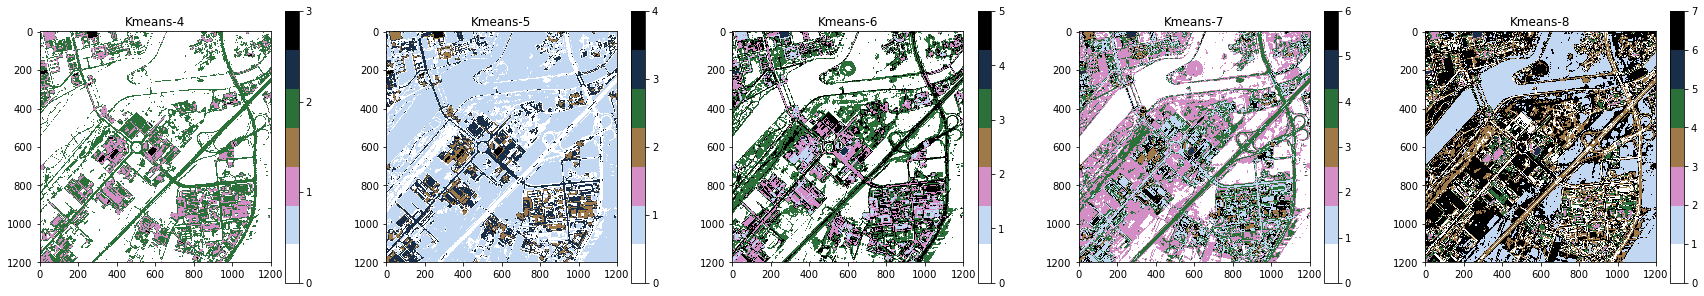

In [6]:
# 成图展示
plt.figure(figsize=(30,5));  titleName=['Kmeans-4','Kmeans-5','Kmeans-6','Kmeans-7','Kmeans-8'];
for index in range(0,len(ALLfinaLabel)):
    plt.subplot(1,5,index+1);
    mylabel=ALLfinaLabel[index];
    im2 = Image.fromarray(mylabel);
    plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',7));
    cbar=plt.colorbar();  cbar.set_ticks(np.linspace(0,7,8));
    plt.title(titleName[index]);
    #cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'));
    #plt.clim(-0.5,6.5)
plt.show();

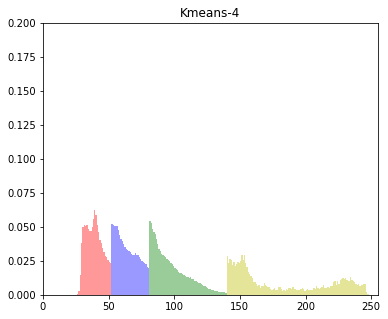

[[  38.52563243]
 [  96.74319169]
 [  63.66862909]
 [ 181.35938063]]


In [7]:
allValue=[];  Kmeans_4=ALLfinaLabel[0];
for h in range(4):
    tempLabel=(Kmeans_4==h)
    tempMask=tempLabel*Tpan;
    finalTemp = tempMask[tempMask>0];
    allValue.append(finalTemp);

Kwars=dict(histtype='stepfilled',alpha=0.4,normed=True,bins=np.arange(0,255));
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c','m'];

plt.figure(figsize=(6,5)); 
for S in range(4):
    intervals=plt.hist(allValue[S],color=cor[S],**Kwars);
plt.xlim(0,255); plt.ylim(0,0.2);
plt.title("Kmeans-4");
plt.show();

print(ALLclusCenters[0]);

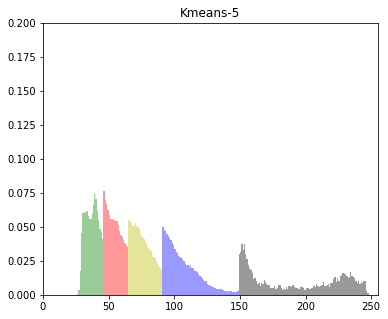

[[  53.86461747]
 [  36.6455269 ]
 [ 106.15392303]
 [  75.21914476]
 [ 191.7359387 ]]


In [8]:
allValue=[];  Kmeans_5=ALLfinaLabel[1];
for h in range(5):
    tempLabel=(Kmeans_5==h)
    tempMask=tempLabel*Tpan;
    finalTemp = tempMask[tempMask>0];
    allValue.append(finalTemp);

Kwars=dict(histtype='stepfilled',alpha=0.4,normed=True,bins=np.arange(0,255));
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c','m'];

plt.figure(figsize=(6,5)); 
for S in range(5):
    intervals=plt.hist(allValue[S],color=cor[S],**Kwars);
plt.xlim(0,255); plt.ylim(0,0.2);
plt.title("Kmeans-5");
plt.show();

print(ALLclusCenters[1]);

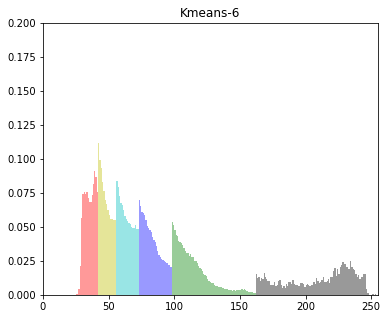

[[  35.06592882]
 [ 113.28308276]
 [  82.30318354]
 [  47.54978357]
 [ 209.77923547]
 [  63.16048631]]


In [9]:
allValue=[];  Kmeans_6=ALLfinaLabel[2];
for h in range(6):
    tempLabel=(Kmeans_6==h)
    tempMask=tempLabel*Tpan;
    finalTemp = tempMask[tempMask>0];
    allValue.append(finalTemp);

Kwars=dict(histtype='stepfilled',alpha=0.4,normed=True,bins=np.arange(0,255));
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c','m'];

plt.figure(figsize=(6,5)); 
for S in range(6):
    intervals=plt.hist(allValue[S],color=cor[S],**Kwars);
plt.xlim(0,255); plt.ylim(0,0.2);
plt.title("Kmeans-6");
plt.show();

print(ALLclusCenters[2]);

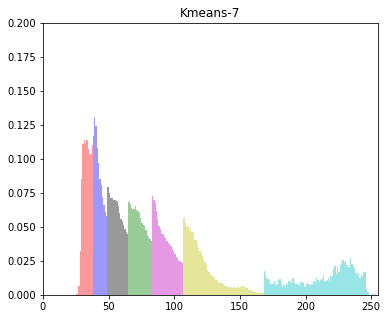

[[  32.8449157 ]
 [  72.65527548]
 [  42.16542133]
 [ 121.17532862]
 [  55.73577756]
 [ 213.40595994]
 [  92.1562775 ]]


In [10]:
allValue=[];  Kmeans_7=ALLfinaLabel[3];
for h in range(7):
    tempLabel=(Kmeans_7==h)
    tempMask=tempLabel*Tpan;
    finalTemp = tempMask[tempMask>0];
    allValue.append(finalTemp);

Kwars=dict(histtype='stepfilled',alpha=0.4,normed=True,bins=np.arange(0,255));
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c','m'];

plt.figure(figsize=(6,5)); 
for S in range(7):
    intervals=plt.hist(allValue[S],color=cor[S],**Kwars);
plt.xlim(0,255); plt.ylim(0,0.2);
plt.title("Kmeans-7");
plt.show();

print(ALLclusCenters[3]);

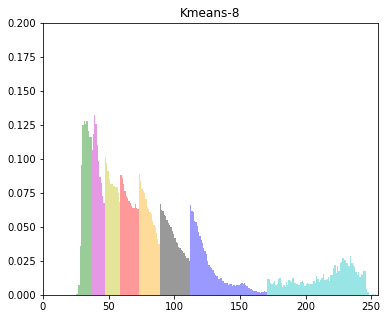

[[  65.07205272]
 [  32.32876125]
 [ 125.70155039]
 [  52.15832979]
 [  98.06930237]
 [ 215.45298927]
 [  40.97480268]
 [  79.41125269]]


In [11]:
allValue=[];  Kmeans_8=ALLfinaLabel[4];
for h in range(8):
    tempLabel=(Kmeans_8==h)
    tempMask=tempLabel*Tpan;
    finalTemp = tempMask[tempMask>0];
    allValue.append(finalTemp);

Kwars=dict(histtype='stepfilled',alpha=0.4,normed=True,bins=np.arange(0,255));
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c','m','orange'];

plt.figure(figsize=(6,5)); 
for S in range(8):
    intervals=plt.hist(allValue[S],color=cor[S],**Kwars);
plt.xlim(0,255); plt.ylim(0,0.2);
plt.title("Kmeans-8");
plt.show();

print(ALLclusCenters[4]);